Found 40 .npy files.


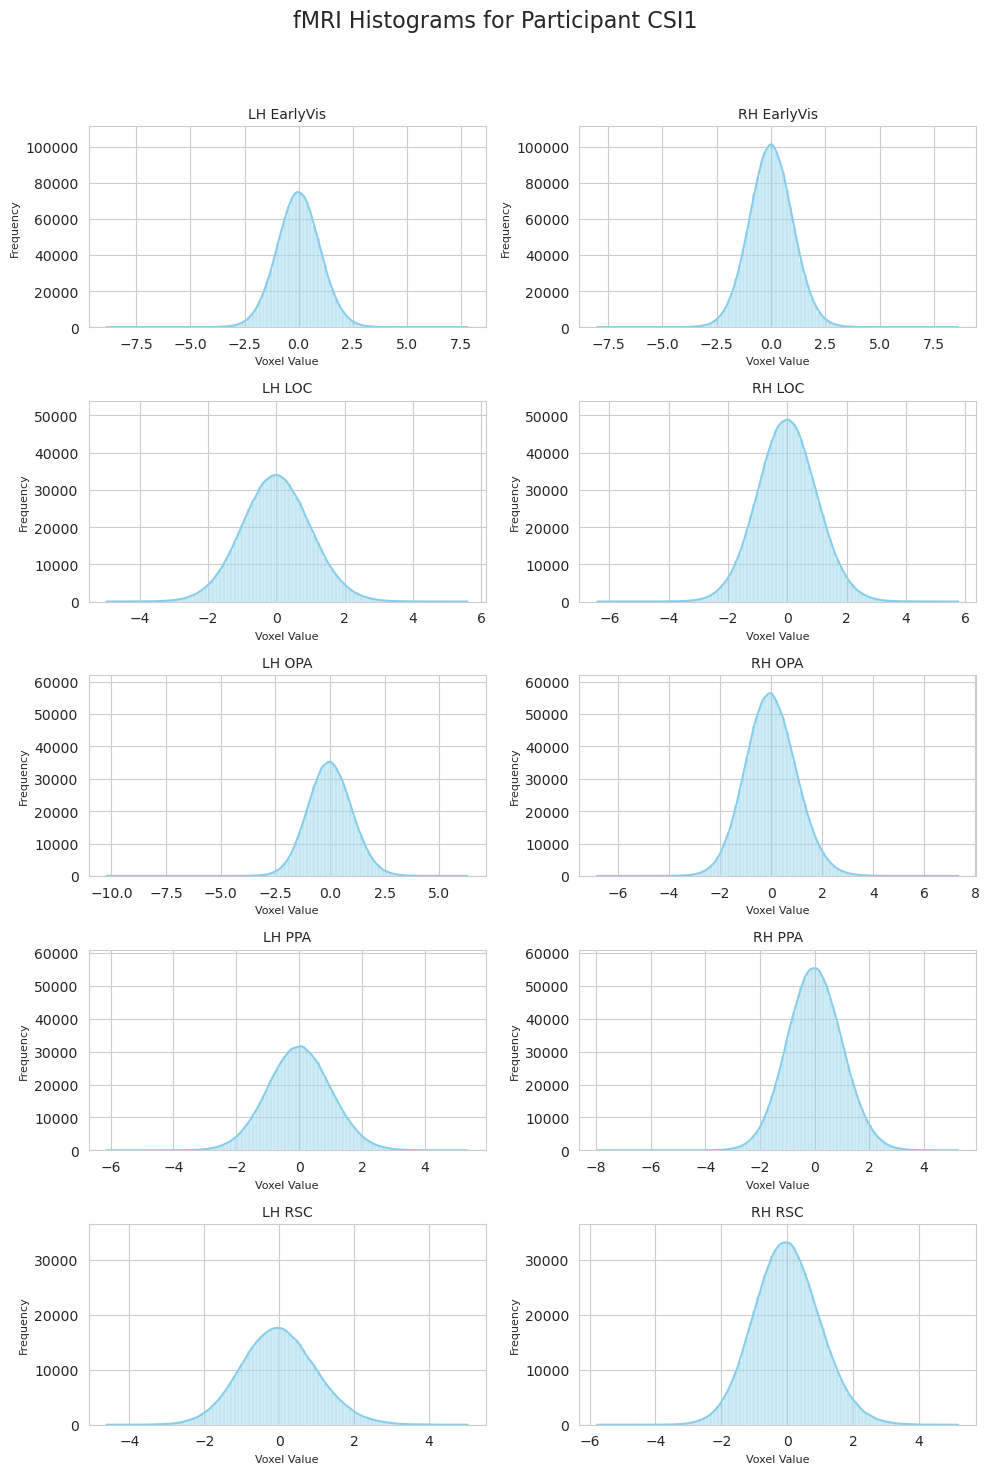

Saved and displayed plot for CSI1 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI1_ROI_comparison.png


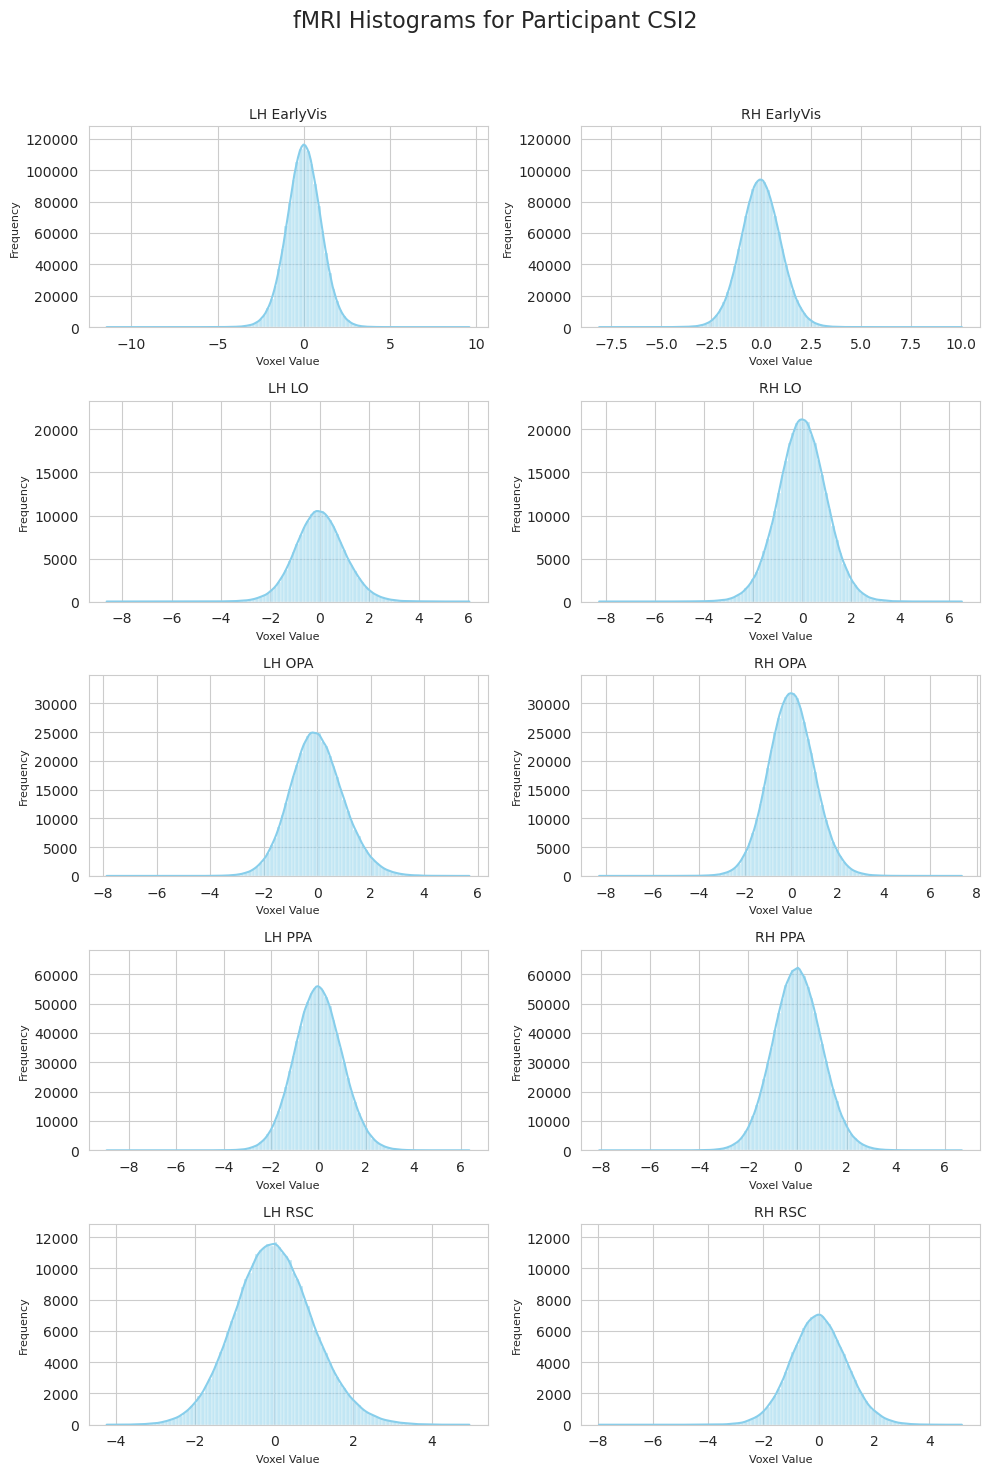

Saved and displayed plot for CSI2 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI2_ROI_comparison.png


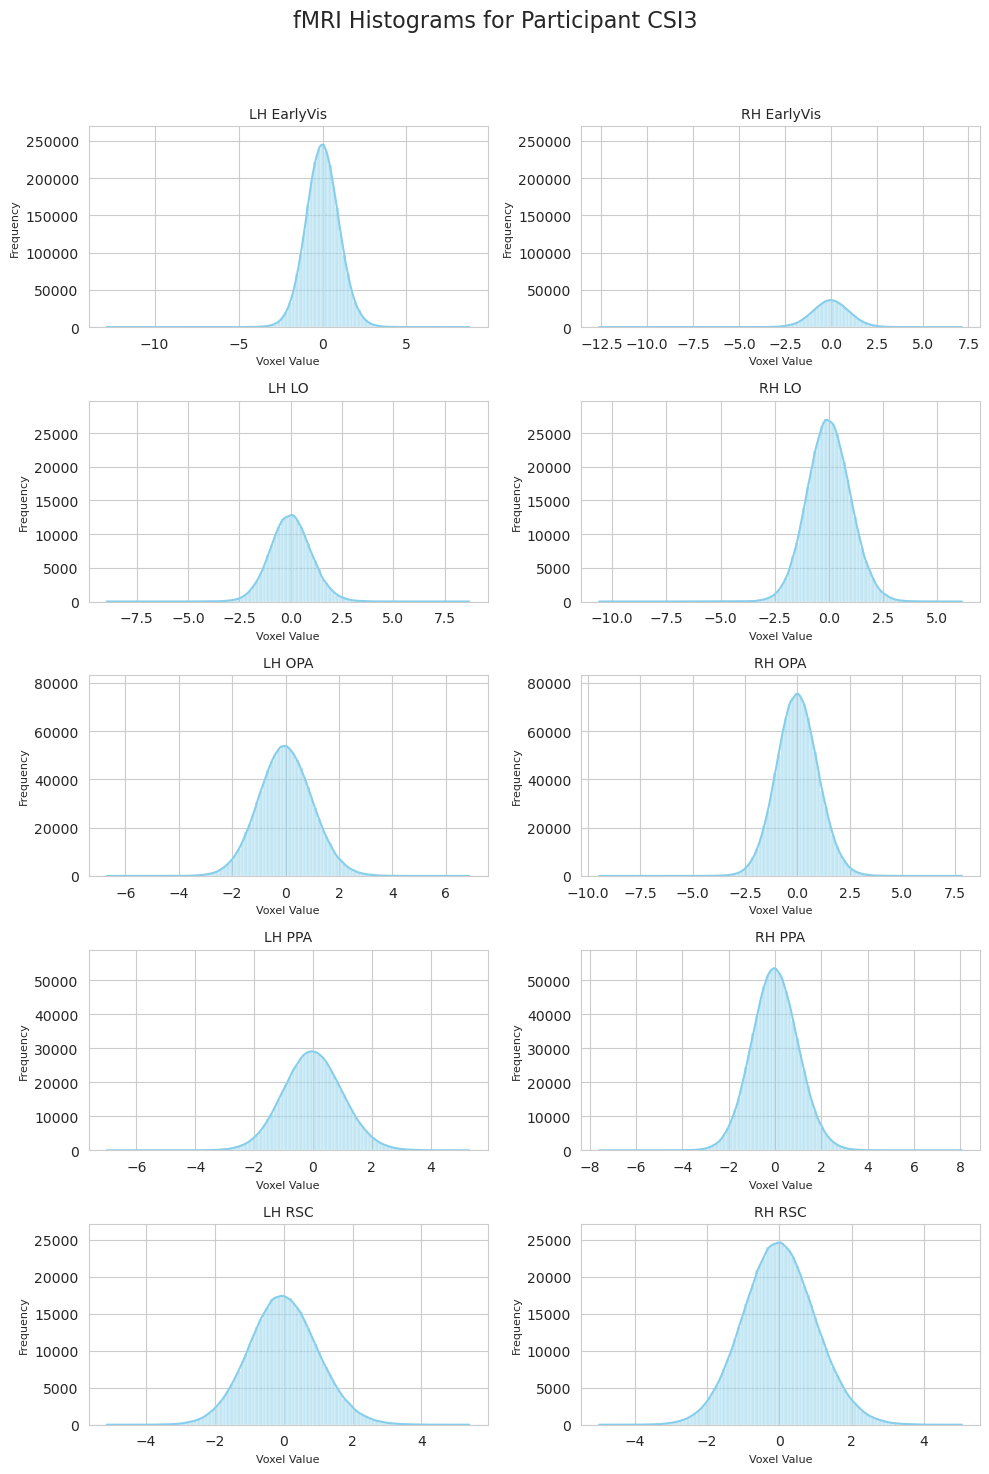

Saved and displayed plot for CSI3 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI3_ROI_comparison.png


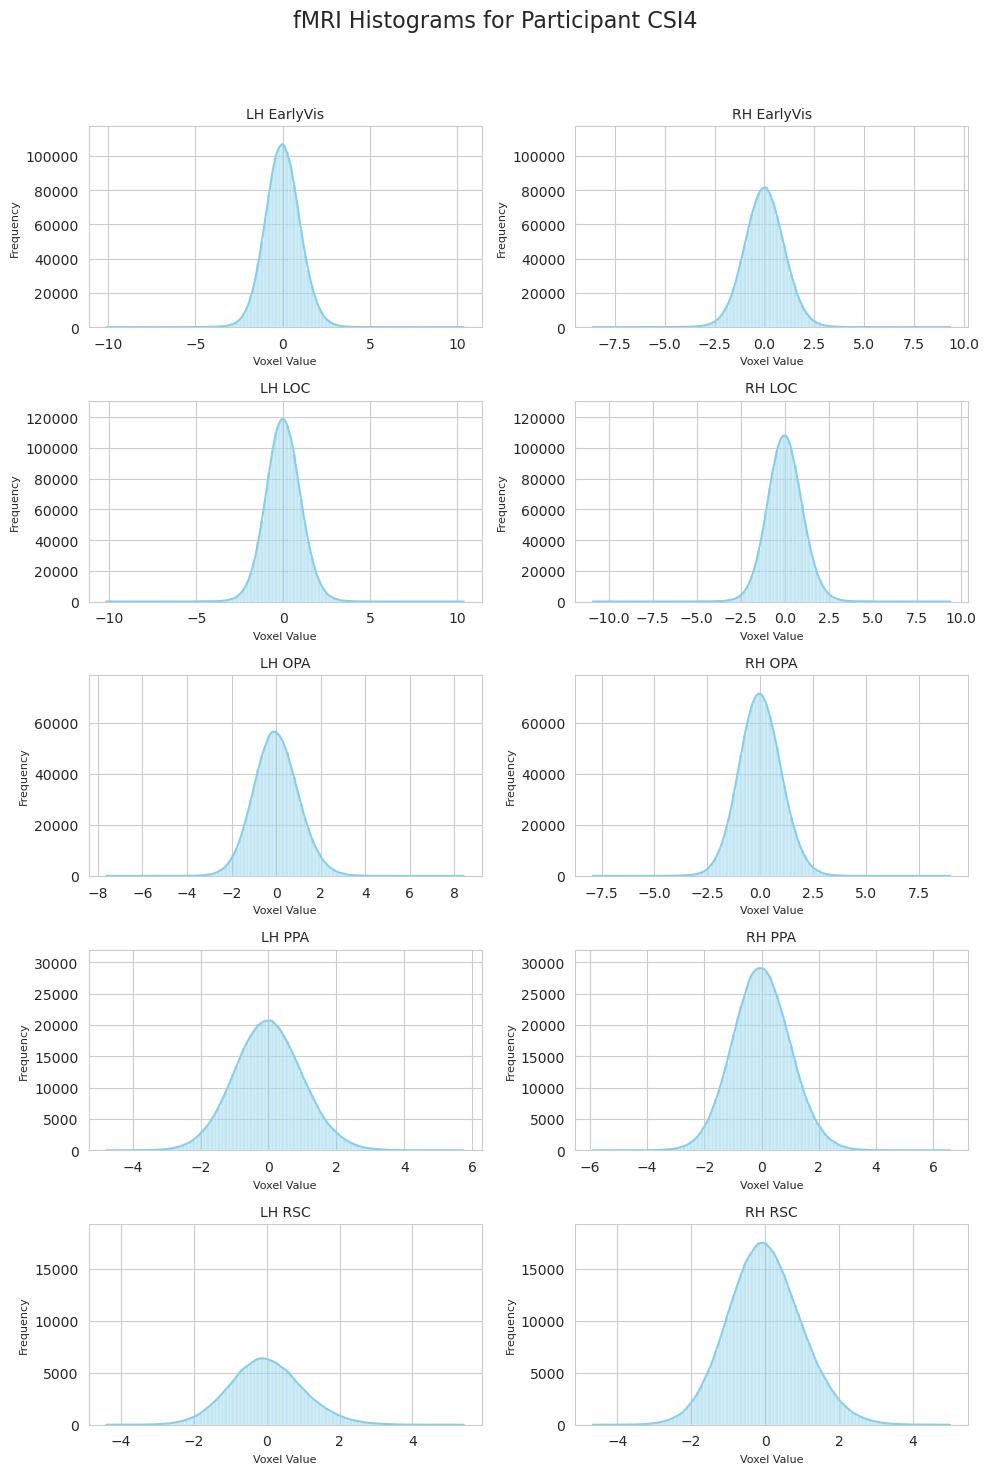

Saved and displayed plot for CSI4 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI4_ROI_comparison.png


In [ ]:
import os
import glob
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Set the data directory (adjust if needed)
DATA_DIR = "/home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py"  # Folder containing your .npy files
OUTPUT_DIR = os.path.join(DATA_DIR, "plots")
os.makedirs(OUTPUT_DIR, exist_ok=True)

# List all .npy files in the folder
npy_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.npy")))
print(f"Found {len(npy_files)} .npy files.")

participant_files = defaultdict(lambda: defaultdict(dict))
for file_path in npy_files:
    fname = os.path.basename(file_path)
    tokens = fname.split("_")
    if len(tokens) < 2:
        continue
    participant = tokens[0]  
    last_token = os.path.splitext(tokens[-1])[0]  
    if len(last_token) < 3:
        continue  
    hemisphere = last_token[:2]  
    roi = last_token[2:]         
    participant_files[participant][roi][hemisphere] = file_path

sns.set_style("whitegrid")

# For each participant, a figure with rows for each ROI and two columns (LH and RH)
participant_files = defaultdict(lambda: defaultdict(dict))
for file_path in npy_files:
    fname = os.path.basename(file_path)
    tokens = fname.split("_")
    if len(tokens) < 2:
        continue
    participant = tokens[0]  
    last_token = os.path.splitext(tokens[-1])[0] 
    if len(last_token) < 3:
        continue  
    hemisphere = last_token[:2] 
    roi = last_token[2:]        
    
    if roi.startswith("RR"):
        roi = roi[1:]
    participant_files[participant][roi][hemisphere] = file_path

sns.set_style("whitegrid")


for participant, roi_dict in participant_files.items():
    rois = sorted(roi_dict.keys())
    n_rois = len(rois)
    
    fig, axs = plt.subplots(n_rois, 2, figsize=(2*5, n_rois*3), squeeze=False)
    fig.suptitle(f"fMRI Histograms for Participant {participant}", fontsize=16)
    
    for i, roi in enumerate(rois):
        data_LH = np.load(roi_dict[roi]["LH"]).flatten() if "LH" in roi_dict[roi] else None
        data_RH = np.load(roi_dict[roi]["RH"]).flatten() if "RH" in roi_dict[roi] else None
        
        bins = 100
        hist_LH = np.histogram(data_LH, bins=bins)[0] if data_LH is not None else None
        hist_RH = np.histogram(data_RH, bins=bins)[0] if data_RH is not None else None
        if hist_LH is not None and hist_RH is not None:
            y_max = max(hist_LH.max(), hist_RH.max())
        elif hist_LH is not None:
            y_max = hist_LH.max()
        elif hist_RH is not None:
            y_max = hist_RH.max()
        else:
            y_max = None
        
        for j, hemi in enumerate(["LH", "RH"]):
            ax = axs[i, j]
            if hemi in roi_dict[roi]:
                file_path = roi_dict[roi][hemi]
                data = np.load(file_path)
                flat_data = data.flatten()
                sns.histplot(flat_data, bins=bins, kde=True, ax=ax, color='skyblue')
                ax.set_title(f"{hemi} {roi}", fontsize=10)
                ax.set_xlabel("Voxel Value", fontsize=8)
                ax.set_ylabel("Frequency", fontsize=8)
                if y_max is not None:
                    ax.set_ylim(0, y_max * 1.1) 
            else:
                ax.text(0.5, 0.5, f"No {hemi} file", horizontalalignment='center',
                        verticalalignment='center', fontsize=10)
                ax.set_title(f"{hemi} {roi}", fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    out_fname = os.path.join(OUTPUT_DIR, f"{participant}_ROI_comparison.png")
    plt.savefig(out_fname, dpi=300)
    plt.show() 
    plt.close(fig)
    
    print(f"Saved and displayed plot for {participant} as {out_fname}")

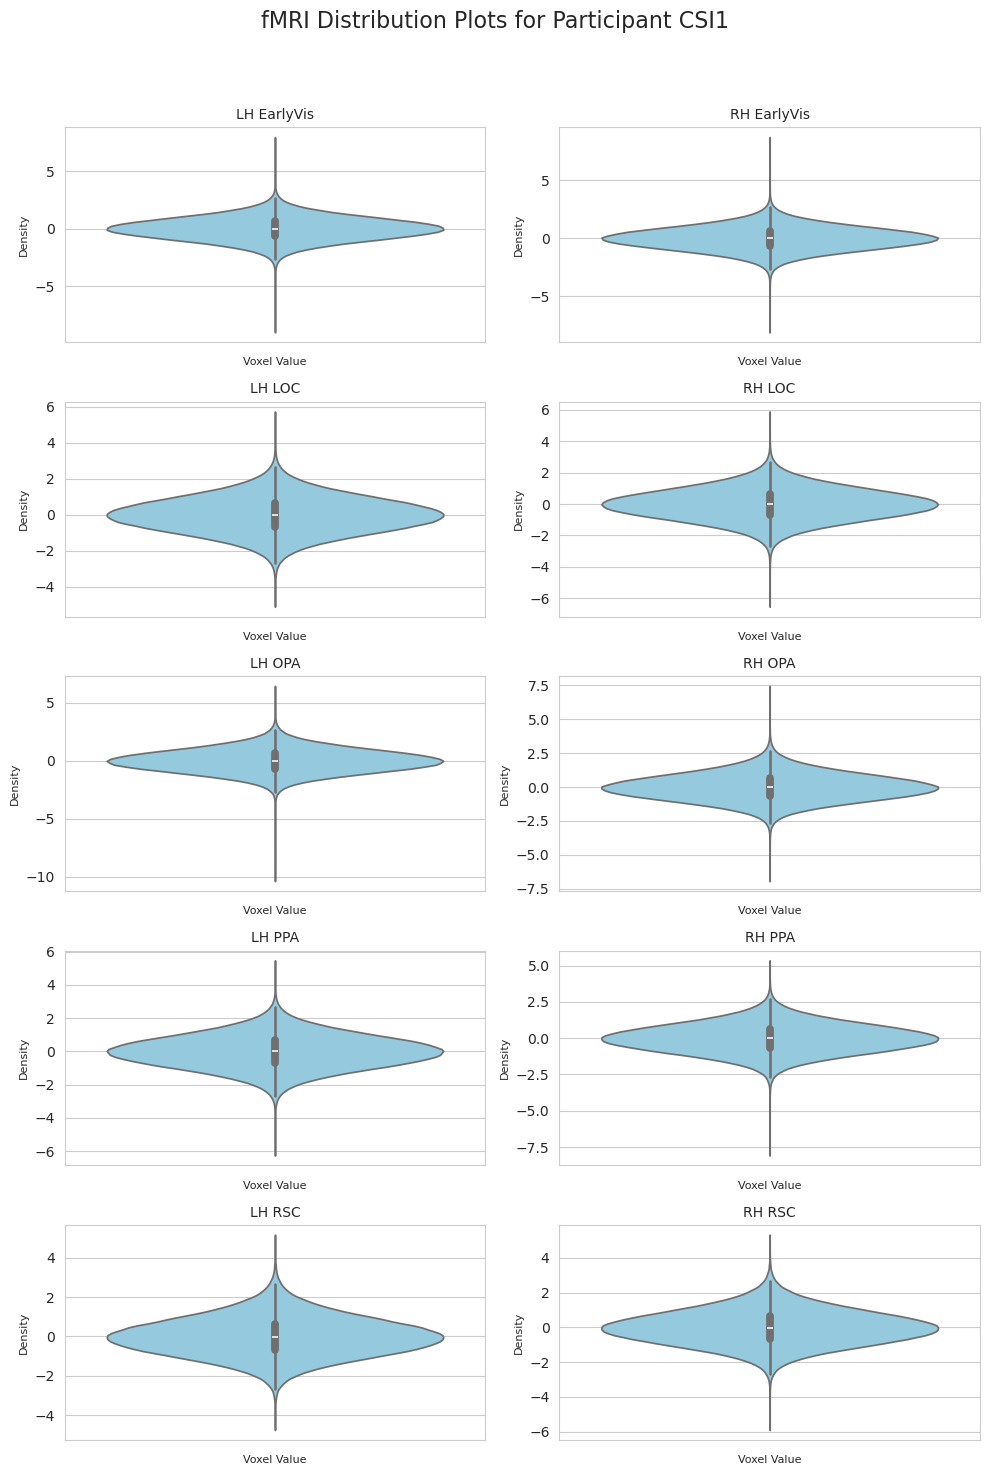

Saved and displayed distribution plot for CSI1 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI1_ROI_distribution_comparison.png


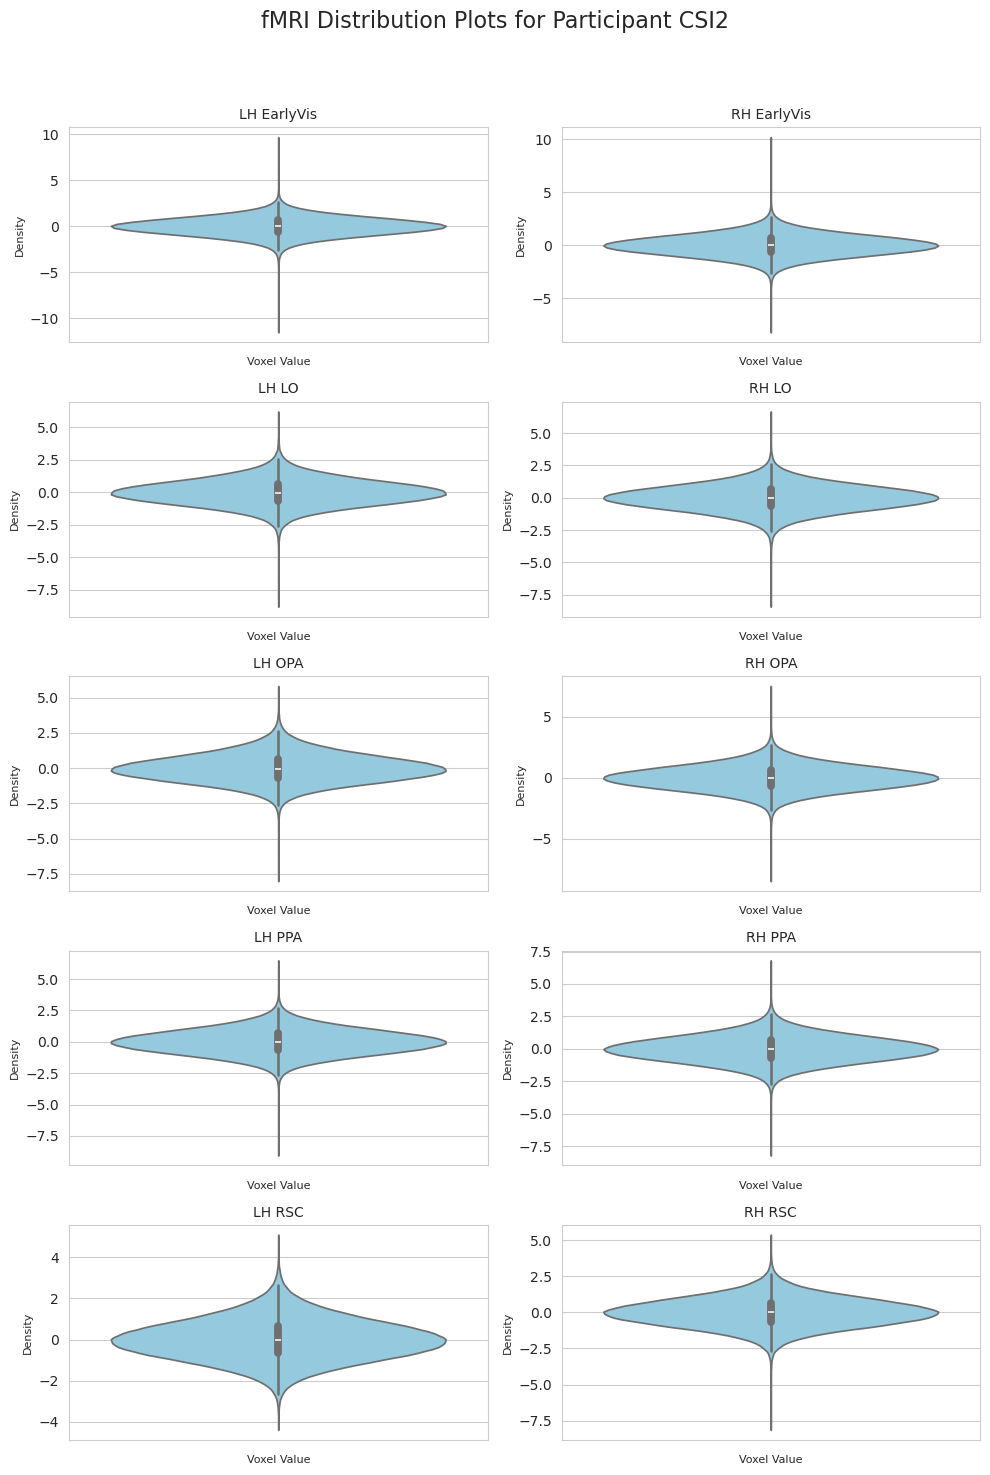

Saved and displayed distribution plot for CSI2 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI2_ROI_distribution_comparison.png


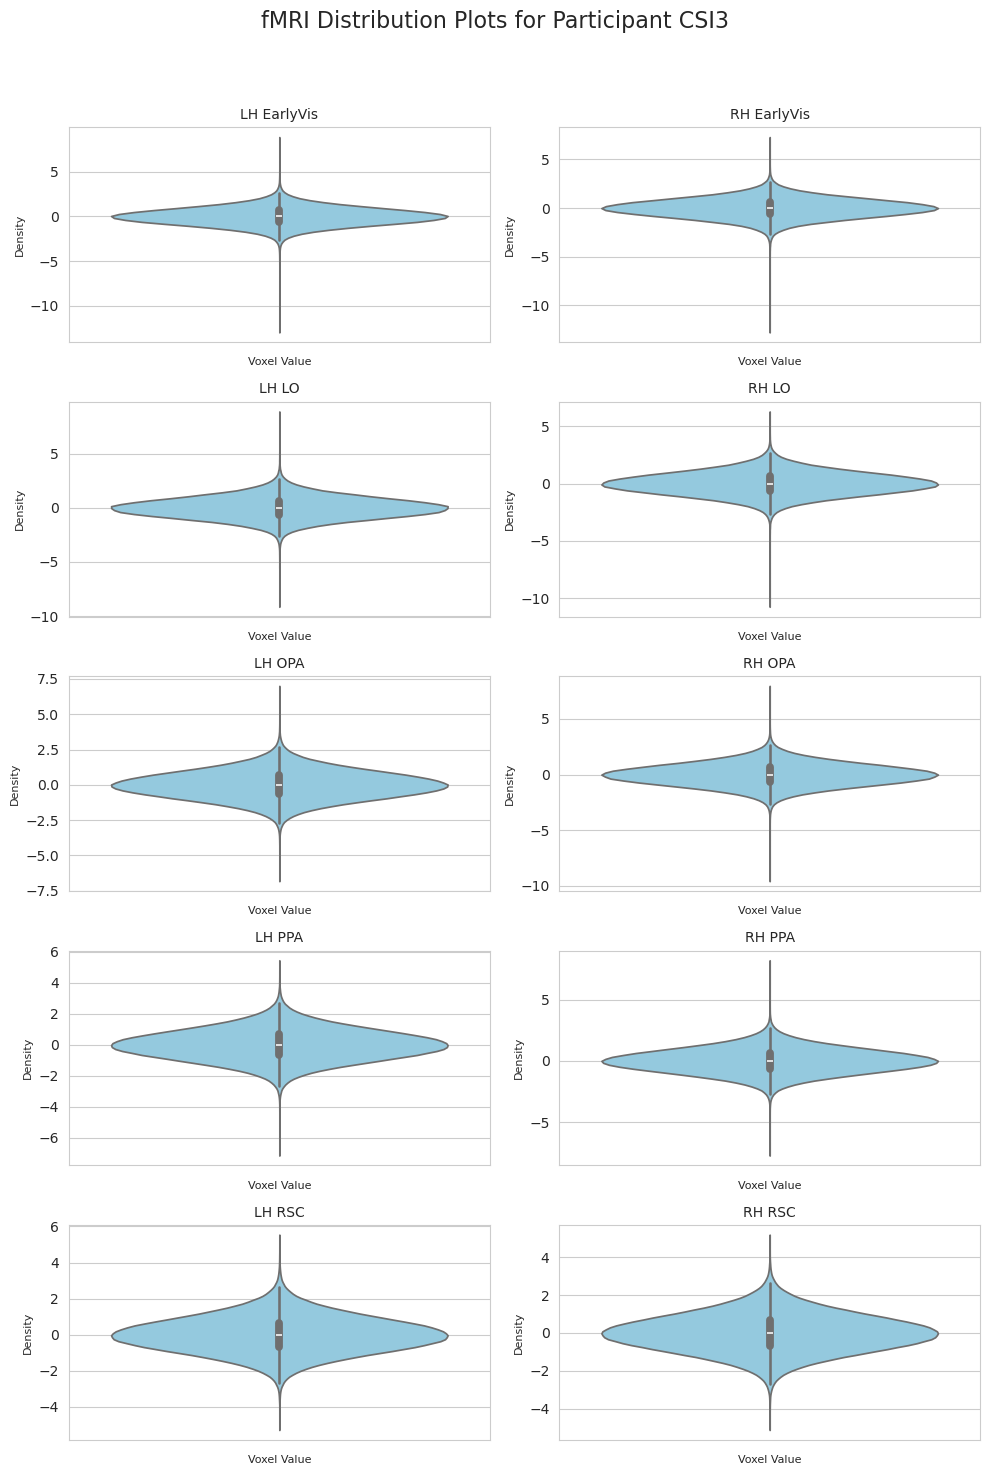

Saved and displayed distribution plot for CSI3 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI3_ROI_distribution_comparison.png


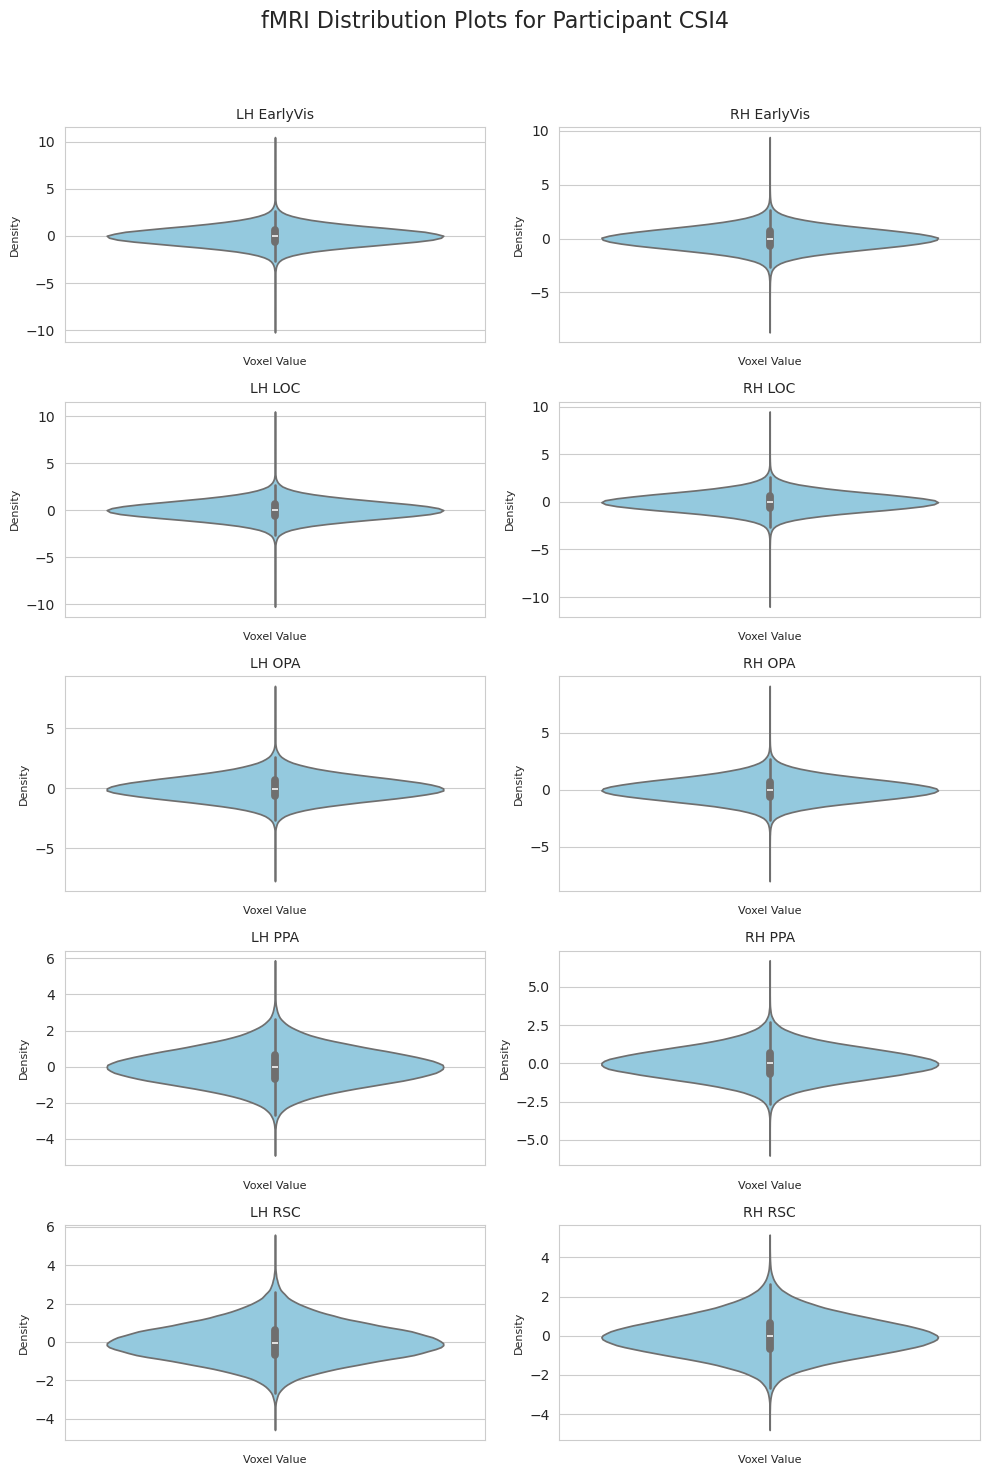

Saved and displayed distribution plot for CSI4 as /home2/prateekj/tether-assgn/data/BOLD5000/BOLD5000_GLMsingle_ROI_betas/py/plots/CSI4_ROI_distribution_comparison.png


In [2]:
# Create boxplots and violin plots to visualize the distribution of voxel values
for participant, roi_dict in participant_files.items():
    rois = sorted(roi_dict.keys())
    n_rois = len(rois)
    
    fig, axs = plt.subplots(n_rois, 2, figsize=(2*5, n_rois*3), squeeze=False)
    fig.suptitle(f"fMRI Distribution Plots for Participant {participant}", fontsize=16)
    
    for i, roi in enumerate(rois):
        data_LH = np.load(roi_dict[roi]["LH"]).flatten() if "LH" in roi_dict[roi] else None
        data_RH = np.load(roi_dict[roi]["RH"]).flatten() if "RH" in roi_dict[roi] else None
        
        # Boxplot and violin plot for both LH and RH hemispheres
        for j, hemi in enumerate(["LH", "RH"]):
            ax = axs[i, j]
            data = data_LH if hemi == "LH" else data_RH
            
            if data is not None:
                sns.violinplot(data=data, ax=ax, color='skyblue')
                ax.set_title(f"{hemi} {roi}", fontsize=10)
                ax.set_xlabel("Voxel Value", fontsize=8)
                ax.set_ylabel("Density", fontsize=8)
            else:
                ax.text(0.5, 0.5, f"No {hemi} file", horizontalalignment='center',
                        verticalalignment='center', fontsize=10)
                ax.set_title(f"{hemi} {roi}", fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    out_fname = os.path.join(OUTPUT_DIR, f"{participant}_ROI_distribution_comparison.png")
    plt.savefig(out_fname, dpi=300)
    plt.show()
    plt.close(fig)
    
    print(f"Saved and displayed distribution plot for {participant} as {out_fname}")
